In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading Train and Test Data

In [0]:
train=pd.read_csv("/content/train_ctrUa4K.csv")
test=pd.read_csv("/content/test_lAUu6dG.csv")

In [3]:
#shape of Data
print("shape of train data",train.shape)
print("shape of test data",test.shape)

shape of train data (614, 13)
shape of test data (367, 12)


In [4]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
train.isnull().sum()/len(train) *100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

In [6]:
test.isnull().sum()/len(test) *100

Loan_ID              0.000000
Gender               2.997275
Married              0.000000
Dependents           2.724796
Education            0.000000
Self_Employed        6.267030
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           1.362398
Loan_Amount_Term     1.634877
Credit_History       7.901907
Property_Area        0.000000
dtype: float64

Credit history and Self_Employed has highest percentage of missing value.and it has also direct on Loan_status

Loan amount and Loan term is also important

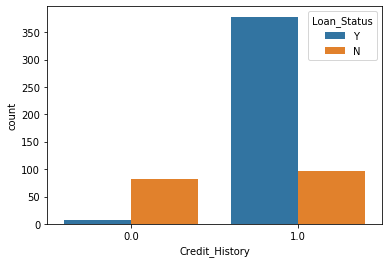

In [7]:
sns.countplot(x=train['Credit_History'],hue=train["Loan_Status"])
sns.set_style("whitegrid")

Credit history and Loan status has good relationship. So missing value should be predicted with respect to other parameter

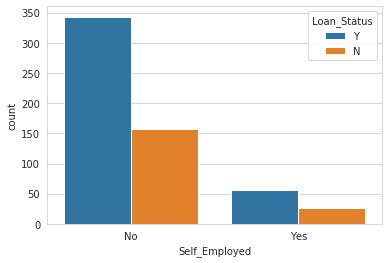

In [8]:
sns.countplot(x=train['Self_Employed'],hue=train["Loan_Status"])
sns.set_style("whitegrid")

Self_Employed and Loan status also has good relationship. So missing value should be predicted with respect to other parameter.
We can also see, loan is applied by non Self_employed people more


Now let' explore relationship between Self_Employed and credit score

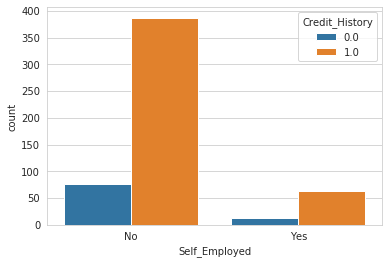

In [9]:
sns.countplot(x=train['Self_Employed'],hue=train["Credit_History"])
sns.set_style("whitegrid")

Number of self employed people applied for the loan is very less.and people applied for the loan might aware of their good credit score.We need to focus more on salaried people 
Applicant's income might be an important point.Let's have look at distribution of applicant's income for salaried people

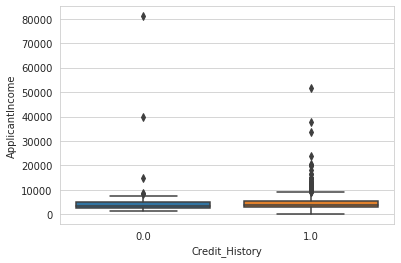

In [10]:
y=train[train['Self_Employed']=="No"]['ApplicantIncome']
sns.boxplot(x=train["Credit_History"],y=y)

In [11]:
train.groupby(["Credit_History"])['ApplicantIncome'].median()

Credit_History
0.0    3547
1.0    3859
Name: ApplicantIncome, dtype: int64

In [12]:
th=(3547+3859)/2
th

3703.0

In [13]:
train.groupby(['Self_Employed'])['ApplicantIncome'].median()

Self_Employed
No     3705.5
Yes    5809.0
Name: ApplicantIncome, dtype: float64

In [14]:
th_self=(3705+5809)/2
th_self

4757.0

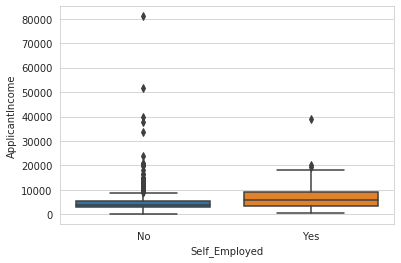

In [15]:
sns.boxplot(x=train['Self_Employed'],y=train['ApplicantIncome'])

In [16]:
train['Self_Employed'].value_counts()

No     500
Yes     82
Name: Self_Employed, dtype: int64

In [0]:
train['Self_Employed'].fillna(-1,inplace=True)
test['Self_Employed'].fillna(-1,inplace=True)

In [0]:
train["Credit_History"].fillna(-99,inplace=True)
test["Credit_History"].fillna(-99,inplace=True)

In [19]:
len(train)
len(test)

367

In [20]:

i=0
for i in range(len(train)):
  if (train['Self_Employed'][i]==-1) and (train['ApplicantIncome'][i] >= th_self) :
    train['Self_Employed'][i] ="Yes" 
  elif(train['Self_Employed'][i]==-1) and (train['ApplicantIncome'][i] < th_self):
    train['Self_Employed'][i] ="No"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [21]:
i=0
for i in range(len(test)):
  if (test['Self_Employed'][i]==-1) and (test['ApplicantIncome'][i] >= th_self) :
    test['Self_Employed'][i] ="Yes" 
  elif(test['Self_Employed'][i]==-1) and (test['ApplicantIncome'][i] < th_self):
    test['Self_Employed'][i] ="No"

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [22]:
train['Self_Employed'].value_counts()

No     522
Yes     92
Name: Self_Employed, dtype: int64

In [23]:
train["Credit_History"].value_counts()

 1.0     475
 0.0      89
-99.0     50
Name: Credit_History, dtype: int64

In [24]:

i=0
for i in range(608):
  if (train["Credit_History"][i]==-99) and (train['ApplicantIncome'][i] >= th) :
    train['Credit_History'][i] = 1 
  elif(train['Credit_History'][i]==-99) and (train['ApplicantIncome'][i] < th):
    train['Credit_History'][i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [25]:
i=0
for i in range(len(test)):
  if (test["Credit_History"][i]==-99) and (test['ApplicantIncome'][i] >= th) :
    test['Credit_History'][i] = 1 
  elif(train['Credit_History'][i]==-99) and (test['ApplicantIncome'][i] < th):
    test['Credit_History'][i] = 0

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [26]:
train["Credit_History"].value_counts()

1.0    499
0.0    115
Name: Credit_History, dtype: int64

In [27]:
train['Self_Employed'].value_counts()

No     522
Yes     92
Name: Self_Employed, dtype: int64

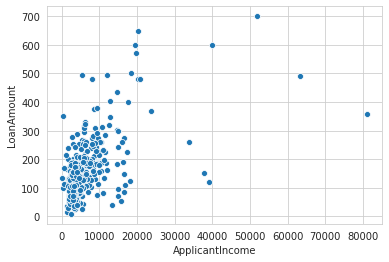

In [28]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=train)

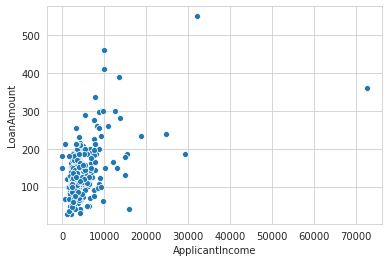

In [29]:
sns.scatterplot(x='ApplicantIncome',y='LoanAmount',data=test)

In [30]:
train["LoanAmount"].isnull().sum()
test["LoanAmount"].isnull().sum()

5

In [0]:
train["LoanAmount"].fillna(-99,inplace=True)
test["LoanAmount"].fillna(-99,inplace=True)

In [32]:
train["LoanAmount"].isnull().sum()

0

In [33]:
y=train['LoanAmount']
x=np.array(train['ApplicantIncome']).reshape((-1, 1))
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [34]:

for i in range(len(train)):
  if (train['LoanAmount'][i]==-99):
    train['LoanAmount'][i]= reg.predict(np.array(train['ApplicantIncome'][i]).reshape((-1, 1)))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path

In [35]:
y=test['LoanAmount']
x=np.array(test['ApplicantIncome']).reshape((-1, 1))
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [36]:

for i in range(len(test)):
  if (test['LoanAmount'][i]==-99):
    test['LoanAmount'][i]= reg.predict(np.array(test['ApplicantIncome'][i]).reshape((-1, 1)))


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path

In [37]:
train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

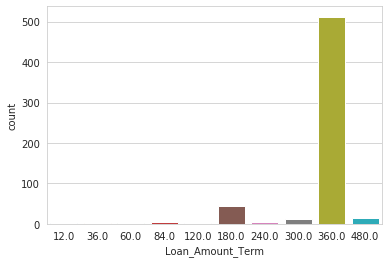

In [38]:
sns.countplot(x=train["Loan_Amount_Term"])

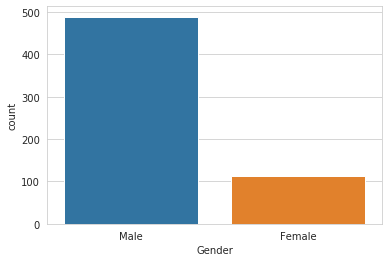

In [39]:
sns.countplot(x=train["Gender"])

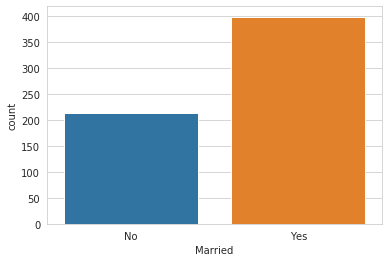

In [40]:
sns.countplot(x=train["Married"])

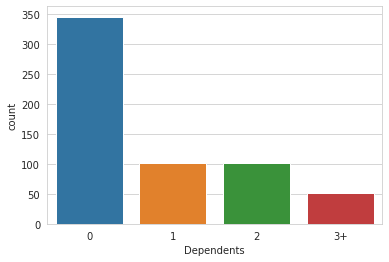

In [41]:
sns.countplot(x=train["Dependents"])

In [0]:
train["Married"]=train["Married"].fillna(train["Married"].mode()[0])
train["Gender"]=train["Gender"].fillna(train["Gender"].mode()[0])
train["Dependents"]=train["Dependents"].fillna(train["Dependents"].mode()[0])
train["Loan_Amount_Term"]=train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0])

In [0]:
#applyed for test data 
train["Married"]=train["Married"].fillna(train["Married"].mode()[0])
train["Gender"]=train["Gender"].fillna(train["Gender"].mode()[0])
train["Dependents"]=train["Dependents"].fillna(train["Dependents"].mode()[0])
train["Loan_Amount_Term"]=train["Loan_Amount_Term"].fillna(train["Loan_Amount_Term"].mode()[0])

In [44]:
train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64